# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
from scipy import stats
#from scipy.stats import beta

In [2]:
%matplotlib inline
fig_width = 25*2
t_titre = 35/2
t_label = 25/2
colors = ['black','dimgrey', 'grey', 'darkgrey', 'rosybrown', 'indianred', 'firebrick', 'brown', 'darkred', 'red']
from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','TN'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','TN'] :
        a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            param.append(b)

In [6]:
p_hat_bcp_e = [[],[],[],[],[],[],[],[],[],[]]
p_hat_bcp_m = [[],[],[],[],[],[],[],[],[],[]]

for x in range(len(exp)):
        
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau
    
    p_hat_block_e = [[],[],[]]
    p_hat_block_m = [[],[],[]]

    
    for block in range(N_blocks):
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            #----------------------------------------------------
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat_e, r_hat_e = bcp.readout(p_bar, r, beliefs, mode='expectation')
            p_hat_m, r_hat_m = bcp.readout(p_bar, r, beliefs, mode='max')
            
            p_hat_block_e[block].extend(p_hat_e)
            p_hat_block_m[block].extend(p_hat_m)

    p_hat_bcp_e[x] = p_hat_block_e
    p_hat_bcp_m[x] = p_hat_block_m

In [7]:
print(len(p_hat_bcp_e[0][0]))

200


In [8]:
# liste de tout
full_proba = []
full_bino = []
full_results = []
full_va = []
full_p_hat_e = []
full_p_hat_m = []


# listes de tout par sujet
proba_sujet = []
bino_sujet = []
results_sujet = []
va_sujet = []
p_hat_sujet_e = []
p_hat_sujet_m = []

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    p_hat_e = p_hat_bcp_e[x]
    p_hat_m = p_hat_bcp_m[x]
    
    liste_proba = []
    liste_bino = []
    liste_results = []
    liste_va = []
    liste_p_hat_e = []
    liste_p_hat_m = []
    
    for block in range(N_blocks):
                
        switch = []
        for s in range(N_trials):
            if s in [0,50,100,150] :
                switch.append(s)
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)
        
        for s1 in range(len(switch)-1) :

            for trial in np.arange(switch[s1], switch[s1+1]) :
                full_proba.append(p[trial, block, 1])
                full_bino.append(p[trial, block, 0])
                full_results.append(results[trial, block])
                full_va.append(v_anti[block][trial])

                liste_proba.append(p[trial, block, 1])
                liste_bino.append(p[trial, block, 0])
                liste_results.append(results[trial, block])
                liste_va.append(v_anti[block][trial])

                full_p_hat_e.append(p_hat_e[block][trial])
                full_p_hat_m.append(p_hat_m[block][trial])

                liste_p_hat_e.append(p_hat_e[block][trial])
                liste_p_hat_m.append(p_hat_m[block][trial])


    proba_sujet.append(liste_proba)
    bino_sujet.append(liste_bino)
    results_sujet.append(liste_results)
    va_sujet.append(liste_va)
    p_hat_sujet_e.append(liste_p_hat_e)
    p_hat_sujet_m.append(liste_p_hat_m)

In [9]:
nb_sujet = len(proba_sujet)

0 = TN
1 = FM
2 = LB


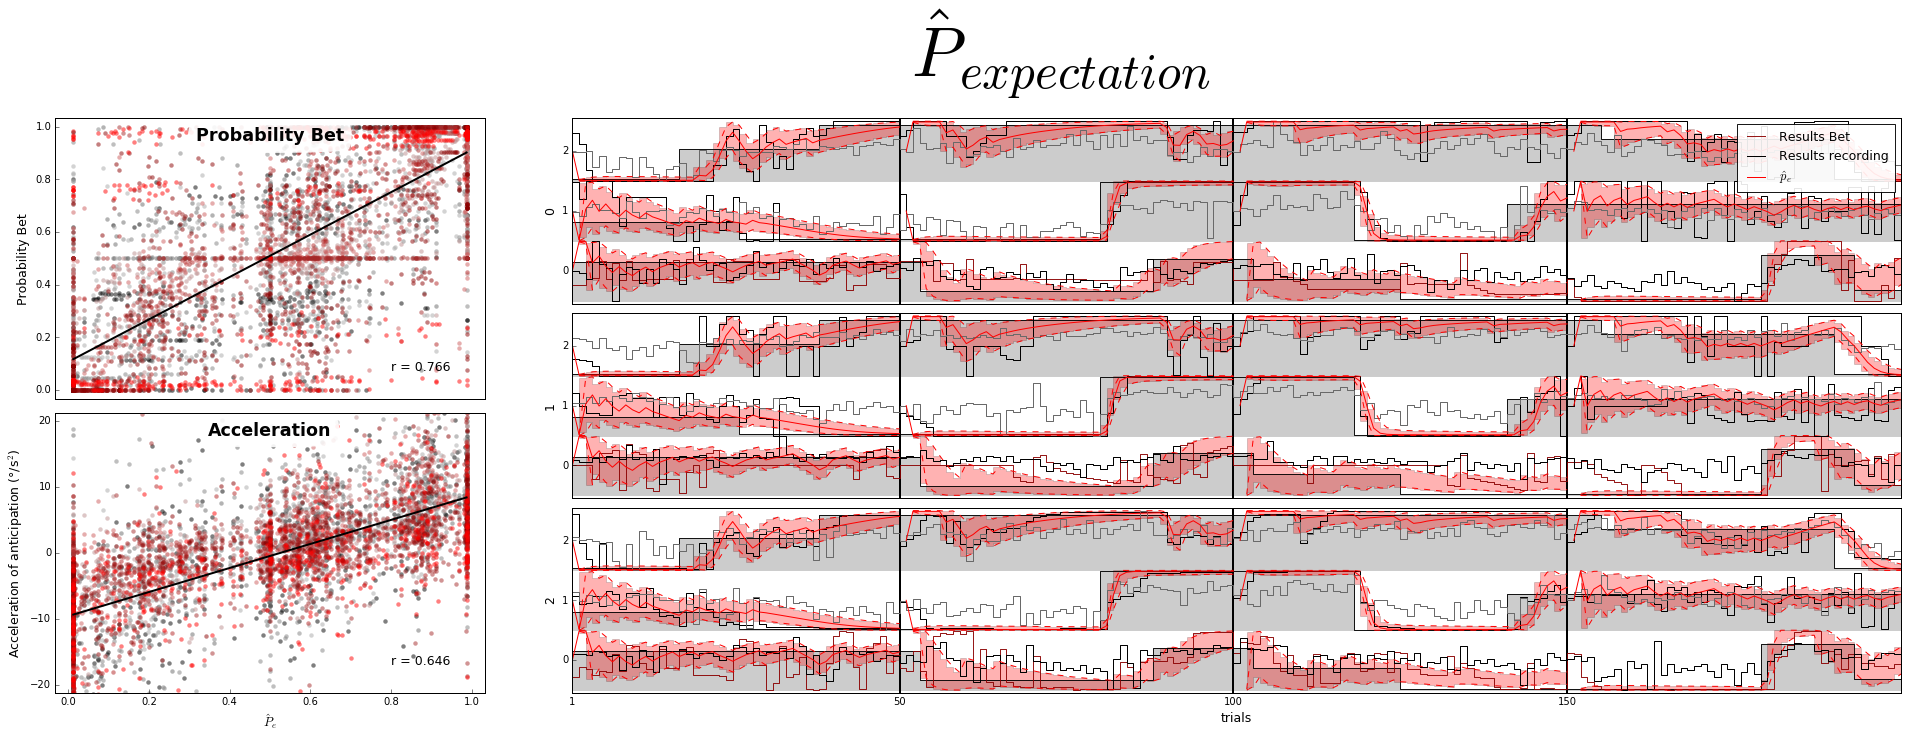

In [10]:
fig, axs = plt.subplots(5, 1, figsize=(fig_width, fig_width/(1.6180*3)))

axs[0] = plt.subplot(322)
axs[1] = plt.subplot(324)
axs[2] = plt.subplot(326)

axs[3] = plt.subplot(263)
axs[4] = plt.subplot(2,6,9)

for x, color in enumerate(['black', 'dimgrey', 'grey']):
    print(x, '=', exp[x]['observer'])
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    
    axs[x].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs[x].axis('tight')
    axs[x].set_yticks(np.arange(N_blocks)+.5)
    axs[x].set_yticklabels(np.arange(N_blocks) )
    #axs[x].set_ylabel(r'$\hat{P}_{e}$', fontsize=t_label)
    axs[x].set_ylabel('%s'%x, fontsize=t_label)
    axs[x].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti = param[x]['v_anti']
    
    for block in range(N_blocks):
        axs[x].fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        if block == 0 :
            axs[x].step(range(N_trials), block + results[:, block], lw=1, alpha=.9, color='darkred', label='Results Bet')
            axs[x].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti))/(np.max(v_anti)-np.min(v_anti))),  color='k', lw=1, alpha=1, label='Results recording')
        else :
            axs[x].step(range(N_trials), block + results[:, block],  color='k', lw=1)
            axs[x].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti))/(np.max(v_anti)-np.min(v_anti))),  color='dimgrey', lw=1, alpha=1)

        
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
            p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
            for i_trial in range(50):#N_trials):
                p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial], b=(1-p_hat[i_trial])*r_hat[i_trial])

            if block == 0 :
                if a == 0 :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_hat, c='r',  lw=1, label='$\hat{p}_e$')
            else :
                axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_hat, c='r',  lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_sup, 'r--', lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_low, 'r--', lw=1)

            axs[x].fill_between(np.arange(liste[a], liste[a+1]), block + p_sup, block + p_low, lw=.5, alpha=.3, facecolor='red', step='pre')

        

    axs[x].set_ylim(-.05, N_blocks + .05)

for x, color in enumerate(colors[:nb_sujet]):
    axs[3].scatter(p_hat_sujet_e[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
    axs[4].scatter(p_hat_sujet_e[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

slope, intercept, r_, p_value, std_err = stats.linregress(full_p_hat_e, full_results)
x_test = np.linspace(np.min(full_p_hat_e), np.max(full_p_hat_e), 100)
fitLine = slope * x_test + intercept
axs[3].plot(x_test, fitLine, c='k', linewidth=2)
axs[3].text(0.8,-0.032+(1.032--0.032)/10, 'r = %0.3f'%(r_), fontsize=t_label)

axs[3].axis([-0.032, 1.032, -0.032, 1.032])
axs[3].set_xticks([])
axs[3].set_ylabel('Probability Bet', fontsize=t_label)
axs[3].set_title("Probability Bet", y=0.9, fontsize=t_titre, fontweight="bold", bbox={'fc':'white', 'alpha':0.9,'lw':0, 'pad':0.5, 'boxstyle':'round4'})
#axs[3].set_xlabel('$\hat{P}_{e}$', fontsize=t_label)    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_e, full_va)
x_test = np.linspace(np.min(full_p_hat_e), np.max(full_p_hat_e), 100)
fitLine = slope * x_test + intercept
axs[4].plot(x_test, fitLine, c='k', linewidth=2)
axs[4].text(0.8,-21.28+(21.28--21.28)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

axs[4].axis([-0.032, 1.032, -21.28, 21.28])
axs[4].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
axs[4].set_title("Acceleration", y=0.9, fontsize=t_titre, fontweight="bold",bbox={'fc':'white', 'alpha':0.9,'lw':0, 'pad':0.5, 'boxstyle':'round4'})
axs[4].set_xlabel('$\hat{P}_{e}$', fontsize=t_label)    
    
    
for i_layer in range(len(axs)) :
    axs[i_layer].xaxis.set_ticks_position('bottom')
    axs[i_layer].yaxis.set_ticks_position('left')
    if i_layer in [0,1] :
        axs[i_layer].set_xticks([])
    elif i_layer == 2 :
        axs[i_layer].set_xlabel('trials', fontsize=t_label)
        axs[i_layer].set_xticks([0, 49, 99,149])
        axs[i_layer].set_xticklabels([1, 50, 100, 150])

axs[0].legend(framealpha=0.9, borderpad=0.5, fontsize=t_label)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle('$\hat{P}_{expectation}$', fontsize=t_titre*4, x=(1/2)+(1/6), y=1.05)
plt.show()

0 = TN
1 = FM
2 = LB
3 = DC
4 = IP
5 = AM
6 = BMC
7 = OP
8 = CS
9 = RS


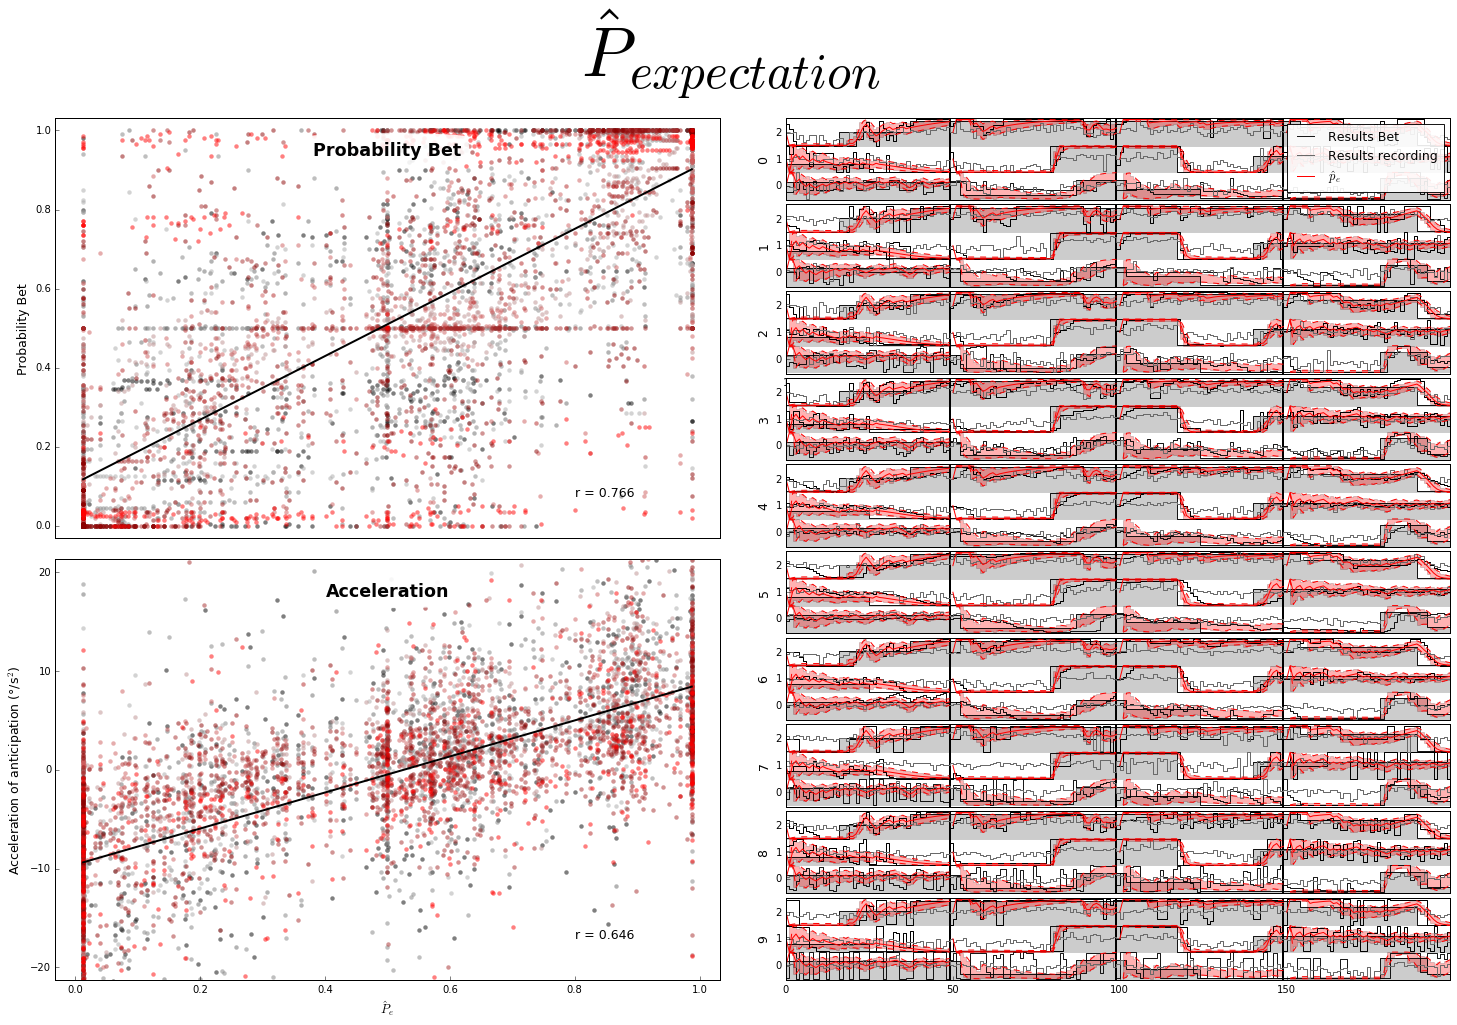

In [11]:
fig, axs = plt.subplots(12, 1, figsize=(fig_width/2, (fig_width/2)/(1.6180)))

axs[0] = plt.subplot(10, 2, 2)
axs[1] = plt.subplot(10, 2, 4)
axs[2] = plt.subplot(10, 2, 6)
axs[3] = plt.subplot(10, 2, 8)
axs[4] = plt.subplot(10, 2, 10)
axs[5] = plt.subplot(10, 2, 12)
axs[6] = plt.subplot(10, 2, 14)
axs[7] = plt.subplot(10, 2, 16)
axs[8] = plt.subplot(10, 2, 18)
axs[9] = plt.subplot(10, 2, 20)


axs[10] = plt.subplot(2, 2, 1)
axs[11] = plt.subplot(2, 2, 3)

for x, color in enumerate(['black', 'dimgrey', 'grey','darkgrey', 'rosybrown', 'indianred', 'firebrick', 'brown', 'darkred', 'red']):
    print(x, '=', exp[x]['observer'])
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    
    axs[x].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs[x].axis('tight')
    axs[x].set_yticks(np.arange(N_blocks)+.5)
    axs[x].set_yticklabels(np.arange(N_blocks) )
    #axs[x].set_ylabel(r'$\hat{P}_{e}$', fontsize=t_label)
    axs[x].set_ylabel('%s'%x, fontsize=t_label)
    axs[x].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    if x != 9 :
        axs[x].set_xticks([])
    
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti = param[x]['v_anti']
    
    for block in range(N_blocks):
        axs[x].fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        if block == 0 :
            axs[x].step(range(N_trials), block + results[:, block], lw=1, alpha=.9, color='k', label='Results Bet')
            axs[x].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti))/(np.max(v_anti)-np.min(v_anti))),  color='dimgrey', lw=1, alpha=1, label='Results recording')
        else :
            axs[x].step(range(N_trials), block + results[:, block],  color='k', lw=1)
            axs[x].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti))/(np.max(v_anti)-np.min(v_anti))),  color='dimgrey', lw=1, alpha=1)

        
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r, beliefs)
            p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
            for i_trial in range(50):#N_trials):
                p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial], b=(1-p_hat[i_trial])*r_hat[i_trial])

            if block == 0 :
                if a == 0 :
                    axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_hat, c='r',  lw=1, label='$\hat{p}_e$')
            else :
                axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_hat, c='r',  lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_sup, 'r--', lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_low, 'r--', lw=1)

            axs[x].fill_between(np.arange(liste[a], liste[a+1]), block + p_sup, block + p_low, lw=.5, alpha=.3, facecolor='red', step='pre')

        

    axs[x].set_ylim(-.05, N_blocks + .05)

for x, color in enumerate(colors[:nb_sujet]):
    axs[10].scatter(p_hat_sujet_e[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
    axs[11].scatter(p_hat_sujet_e[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

slope, intercept, r_, p_value, std_err = stats.linregress(full_p_hat_e, full_results)
x_test = np.linspace(np.min(full_p_hat_e), np.max(full_p_hat_e), 100)
fitLine = slope * x_test + intercept
axs[10].plot(x_test, fitLine, c='k', linewidth=2)
axs[10].text(0.8,-0.032+(1.032--0.032)/10, 'r = %0.3f'%(r_), fontsize=t_label)

axs[10].axis([-0.032, 1.032, -0.032, 1.032])
axs[10].set_xticks([])
axs[10].set_ylabel('Probability Bet', fontsize=t_label)
axs[10].set_title("Probability Bet", y=0.9, fontsize=t_titre, fontweight="bold", bbox={'fc':'white', 'alpha':0.9,'lw':0, 'pad':0.5, 'boxstyle':'round4'})
#axs[10].set_xlabel('$\hat{P}_{e}$', fontsize=t_label)    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_e, full_va)
x_test = np.linspace(np.min(full_p_hat_e), np.max(full_p_hat_e), 100)
fitLine = slope * x_test + intercept
axs[11].plot(x_test, fitLine, c='k', linewidth=2)
axs[11].text(0.8,-21.28+(21.28--21.28)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

axs[11].axis([-0.032, 1.032, -21.28, 21.28])
axs[11].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
axs[11].set_title("Acceleration", y=0.9, fontsize=t_titre, fontweight="bold",bbox={'fc':'white', 'alpha':0.9,'lw':0, 'pad':0.5, 'boxstyle':'round4'})
axs[11].set_xlabel('$\hat{P}_{e}$', fontsize=t_label)    
    
    
for i_layer in range(len(axs)) :
    axs[i_layer].xaxis.set_ticks_position('bottom')
    axs[i_layer].yaxis.set_ticks_position('left')
    if i_layer in [0,1] :
        axs[i_layer].set_xticks([])
    elif i_layer == 2 :
        axs[i_layer].set_xlabel('trials', fontsize=t_label)
        axs[i_layer].set_xticks([0, 49, 99,149])
        axs[i_layer].set_xticklabels([1, 50, 100, 150])

axs[0].legend(framealpha=0.9, borderpad=0.5, fontsize=t_label)

#fig.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle('$\hat{P}_{expectation}$', fontsize=t_titre*4, x=0.5, y=1)
plt.show()

0 = TN
1 = FM
2 = LB


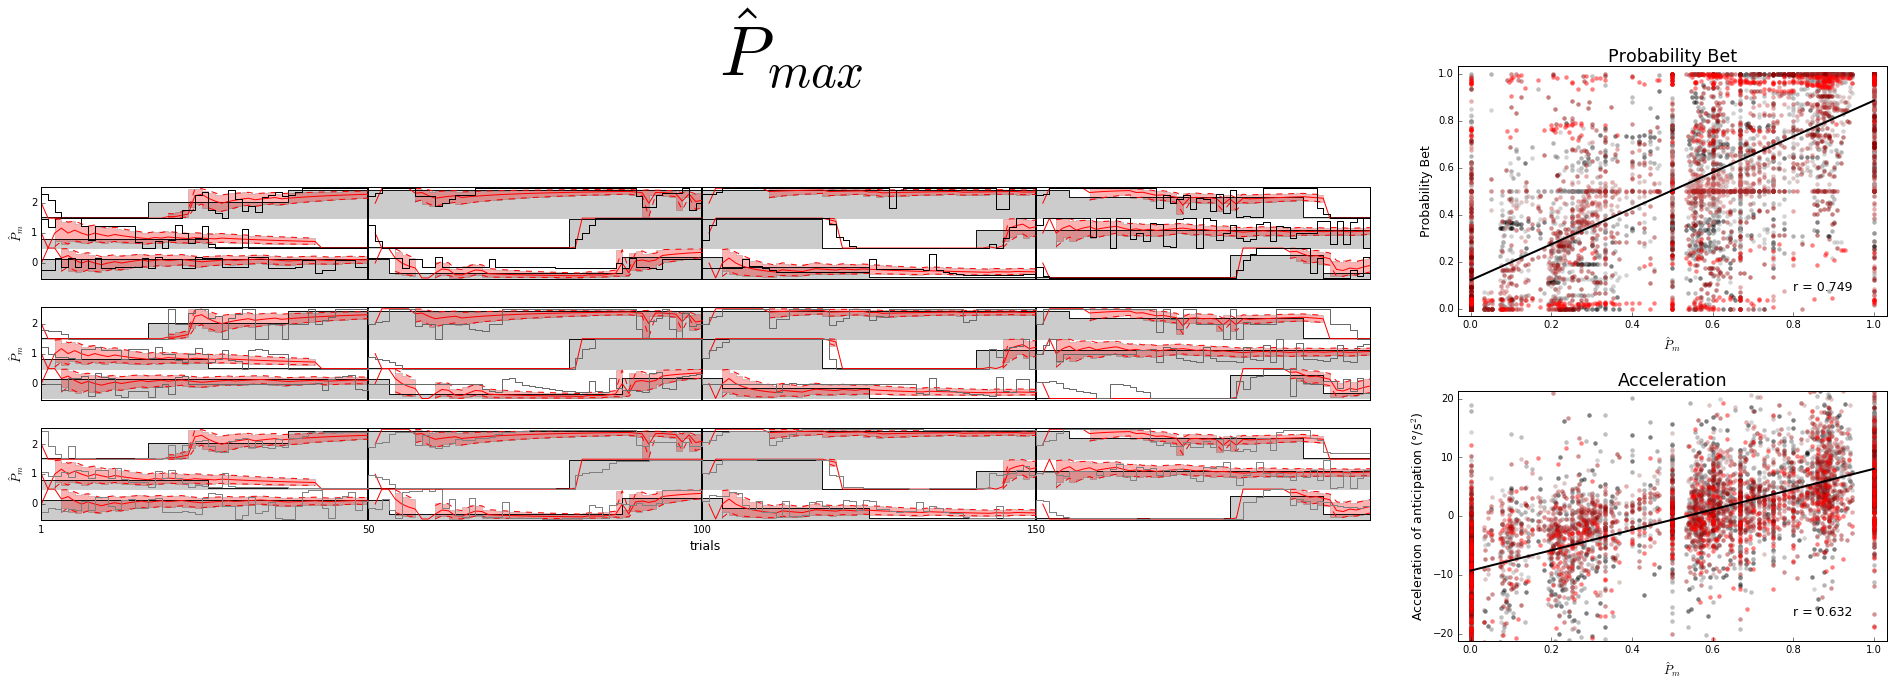

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(fig_width, fig_width/(1.6180*3)))

axs[0] = plt.subplot(523)
axs[1] = plt.subplot(525)
axs[2] = plt.subplot(527)

axs[3] = plt.subplot(264)
axs[4] = plt.subplot(2,6,10)

for x, color in enumerate(['black', 'dimgrey', 'grey']):
    print(x, '=', exp[x]['observer'])
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau 
    
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    
    axs[x].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.9)
    axs[x].axis('tight')
    axs[x].set_yticks(np.arange(N_blocks)+.5)
    axs[x].set_yticklabels(np.arange(N_blocks) )
    axs[x].set_ylabel(r'$\hat{P}_{m}$', fontsize=t_label)
    axs[x].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[x].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    
    for block in range(N_blocks):
        axs[x].fill_between(range(N_trials), block + np.zeros_like(p[:, block, 1]), block + p[:, block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r, beliefs, mode='max')
            p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
            for i_trial in range(50):#N_trials):
                p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial], b=(1-p_hat[i_trial])*r_hat[i_trial])

            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_hat, c='r',  lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_sup, 'r--', lw=1)
            axs[x].plot(np.arange(liste[a], liste[a+1]), block + p_low, 'r--', lw=1)

            axs[x].fill_between(np.arange(liste[a], liste[a+1]), block + p_sup, block + p_low, lw=.5, alpha=.3, facecolor='red', step='pre')

        axs[x].step(range(N_trials), block + results[:, block],  color=color, lw=1)
        
    axs[x].set_ylim(-.05, N_blocks + .05)


for x, color in enumerate(colors[:nb_sujet]):
    axs[3].scatter(p_hat_sujet_m[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
    axs[4].scatter(p_hat_sujet_m[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_m, full_results)
x_test = np.linspace(np.min(full_p_hat_m), np.max(full_p_hat_m), 100)
fitLine = slope * x_test + intercept
axs[3].plot(x_test, fitLine, c='k', linewidth=2)
axs[3].text(0.8,-0.032+(1.032--0.032)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

axs[3].axis([-0.032, 1.032, -0.032, 1.032])
axs[3].set_ylabel('Probability Bet', fontsize=t_label)
axs[3].set_title("Probability Bet", fontsize=t_titre)
axs[3].set_xlabel('$\hat{P}_{m}$', fontsize=t_label)    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_m, full_va)
x_test = np.linspace(np.min(full_p_hat_m), np.max(full_p_hat_m), 100)
fitLine = slope * x_test + intercept
axs[4].plot(x_test, fitLine, c='k', linewidth=2)
axs[4].text(0.8,-21.28+(21.28--21.28)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

axs[4].axis([-0.032, 1.032, -21.28, 21.28])
axs[4].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
axs[4].set_title("Acceleration", fontsize=t_titre)
axs[4].set_xlabel('$\hat{P}_{m}$', fontsize=t_label)    
    
    
for i_layer in range(len(axs)) :
    axs[i_layer].xaxis.set_ticks_position('bottom')
    axs[i_layer].yaxis.set_ticks_position('left')
    if i_layer in [0,1] :
        axs[i_layer].set_xticks([])
    elif i_layer == 2 :
        axs[i_layer].set_xlabel('trials', fontsize=t_label)
        axs[i_layer].set_xticks([0, 49, 99,149])
        axs[i_layer].set_xticklabels([1, 50, 100, 150])


#fig.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.suptitle('$\hat{P}_{max}$', fontsize=t_titre*4, x=((1/2)+(1/6))/2)
plt.show()